In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='count'>

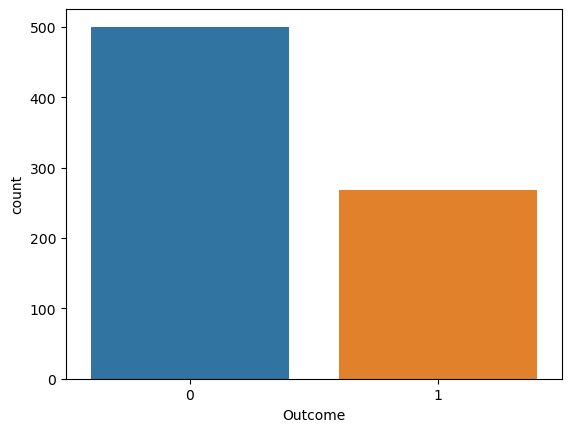

In [3]:
sns.countplot(x = 'Outcome', data = df)

In [4]:
print('No of zero values in Glucose', df[df['Glucose'] == 0].shape[0])
print('No of zero values in BloodPressure', df[df['BloodPressure'] == 0].shape[0])
print('No of zero values in SkinThickness', df[df['SkinThickness'] == 0].shape[0])
print('No of zero values in Insulin', df[df['Insulin'] == 0].shape[0])
print('No of zero values in BMI', df[df['BMI'] == 0].shape[0])
print('No of zero values in DiabetesPedigreeFunction', df[df['DiabetesPedigreeFunction'] == 0].shape[0])
print('No of zero values in Age', df[df['Age'] == 0].shape[0])

No of zero values in Glucose 5
No of zero values in BloodPressure 35
No of zero values in SkinThickness 227
No of zero values in Insulin 374
No of zero values in BMI 11
No of zero values in DiabetesPedigreeFunction 0
No of zero values in Age 0


In [5]:
#Replace zero values with the mean of that columns

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
print('No of zero values in Glucose', df[df['Glucose'] == 0].shape[0])

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
print('No of zero values in BloodPressure', df[df['BloodPressure'] == 0].shape[0])

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
print('No of zero values in SkinThickness', df[df['SkinThickness'] == 0].shape[0])

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
print('No of zero values in Insulin', df[df['Insulin'] == 0].shape[0])

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
print('No of zero values in BMI', df[df['BMI'] == 0].shape[0])

No of zero values in Glucose 0
No of zero values in BloodPressure 0
No of zero values in SkinThickness 0
No of zero values in Insulin 0
No of zero values in BMI 0


In [6]:
df['N0'] = df['BMI'] * df['SkinThickness']
df.loc[:,'N1']=0
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1']=1
df.loc[:,'N2']=0
df.loc[(df['BMI']<=30),'N2']=1
df.loc[:,'N3']=0
df.loc[(df['Age']<=30) & (df['Pregnancies']<=6),'N3']=1
df.loc[:,'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=1
df.loc[:,'N5']=0
df.loc[(df['SkinThickness']<=20) ,'N5']=1
df.loc[:,'N6']=0
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=1
df.loc[:,'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=1
df['N8'] =  df['Pregnancies'] / df['Age']
df.loc[:,'N9']=0
df.loc[(df['Insulin']<200),'N9']=1
df.loc[:,'N10']=0
df.loc[(df['BloodPressure']<80),'N10']=1
df.loc[:,'N11']=0
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=1
df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']
df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']
df['N14'] = df['Age'] / df['Insulin']

In [7]:
from sklearn. preprocessing import LabelEncoder
target_col = ["Outcome"]
cat_cols   = df.nunique()[df.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [8]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [9]:
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size = 0.2, random_state = 0)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
class ANN_Model(nn.Module):
    def __init__(self, input_features = 23, hidden1 = 100, hidden2 = 100, hidden3 = 100, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.f_connected3 = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden3, out_features)
    
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = F.relu(self.f_connected3(x))
        x = self.out(x)
        return x

In [14]:
torch.manual_seed(20)
model = ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=23, out_features=100, bias=True)
  (f_connected2): Linear(in_features=100, out_features=100, bias=True)
  (f_connected3): Linear(in_features=100, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=2, bias=True)
)>

In [16]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [17]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    
    if i%10 == 1:
        print("Epochs number: {} and the loss : {}".format(i, loss.item()))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs number: 1 and the loss : 0.715112566947937
Epochs number: 11 and the loss : 0.4171816110610962
Epochs number: 21 and the loss : 0.2943916916847229
Epochs number: 31 and the loss : 0.15608003735542297
Epochs number: 41 and the loss : 0.07178802043199539
Epochs number: 51 and the loss : 0.04631698131561279
Epochs number: 61 and the loss : 0.03891858458518982
Epochs number: 71 and the loss : 0.012960889376699924
Epochs number: 81 and the loss : 0.004142787307500839
Epochs number: 91 and the loss : 0.0022935711313039064
Epochs number: 101 and the loss : 0.001527834334410727
Epochs number: 111 and the loss : 0.0011614739196375012
Epochs number: 121 and the loss : 0.0009381602867506444
Epochs number: 131 and the loss : 0.0007977472268976271
Epochs number: 141 and the loss : 0.0006922368775121868
Epochs number: 151 and the loss : 0.0006104091298766434
Epochs number: 161 and the loss : 0.0005424377741292119
Epochs number: 171 and the loss : 0.0004852314596064389
Epochs number: 181 and t

In [18]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

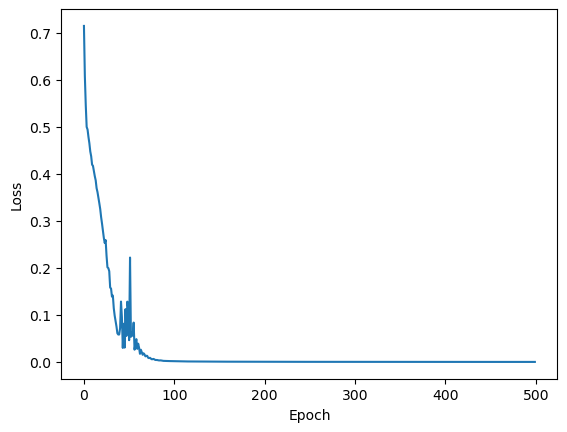

In [19]:
fi_los = [fl.item() for fl in final_losses]
plt.plot(range(epochs), fi_los)
plt.ylabel('Loss')
plt.xlabel('Epoch');

In [20]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
1
0
1
0
0
1
1
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Text(95.72222222222221, 0.5, 'Predicted Value')

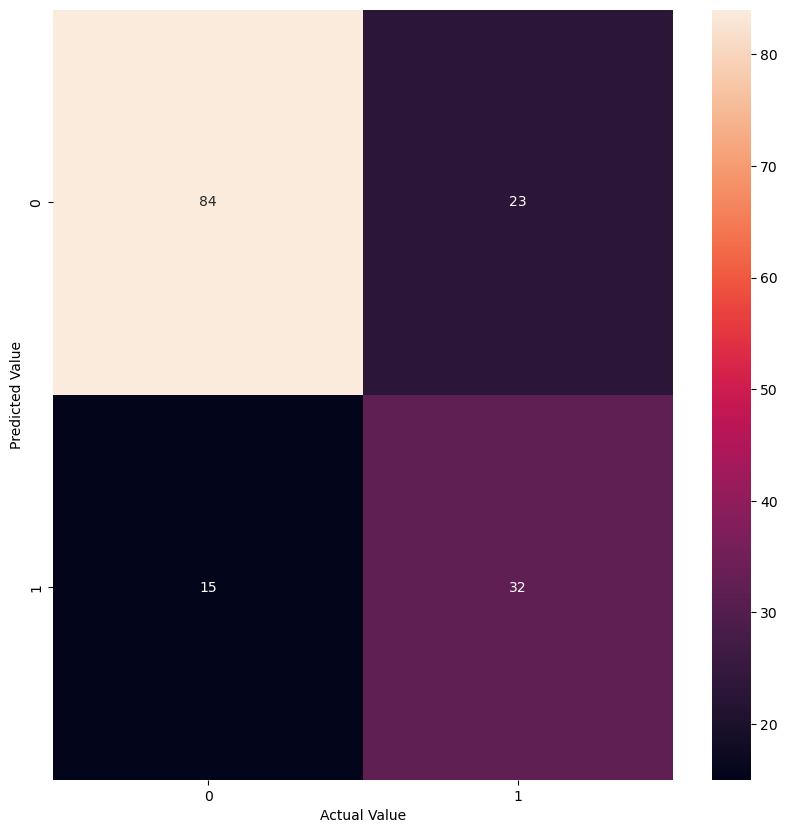

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7532467532467533

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [25]:
auc = roc_auc_score(y_test, predictions)
print('ROC AUC SCORE of ANN is', auc)

ROC AUC SCORE of ANN is 0.7329488964008749


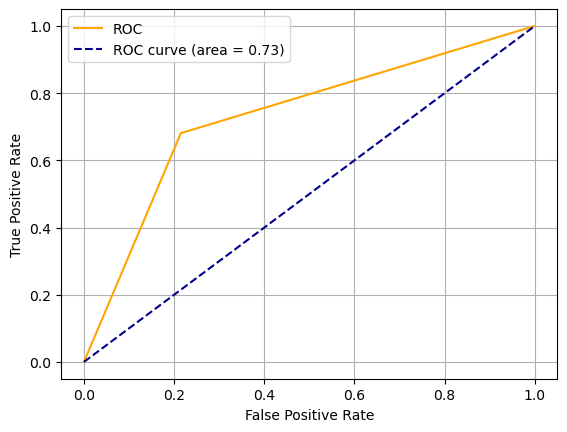

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--', label = 'ROC curve (area = %0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()